<a href="https://colab.research.google.com/github/MokshagnaAnurag/-RushIn-Last-MinuteTicketExchangePlatform/blob/main/Fake_Ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile
import os
zip_path = "ticket_dataset.zip"
extract_path = "ticket_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset structure:")
for root, dirs, files in os.walk(extract_path):
    print(root, len(files))


Dataset structure:
ticket_dataset 0
ticket_dataset/fake 50
ticket_dataset/authentic 50


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_path = os.path.join(extract_path, "train")
valid_path = os.path.join(extract_path, "valid")

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    extract_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

valid_gen = datagen.flow_from_directory(
    extract_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    verbose=1
)

model.save("ticket_model.h5")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 915ms/step - accuracy: 0.4875 - loss: 1.2154 - val_accuracy: 0.5000 - val_loss: 0.8640
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5469 - loss: 0.7736 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 777ms/step - accuracy: 0.4484 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 748ms/step - accuracy: 0.5141 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 754ms/step - accuracy: 0.4427 - loss: 0.7020 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6417 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 765ms/step - accuracy: 0.5602 - loss: 0.6804 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 777ms/step - accuracy: 0.5276 - loss: 0.6834 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 9/1

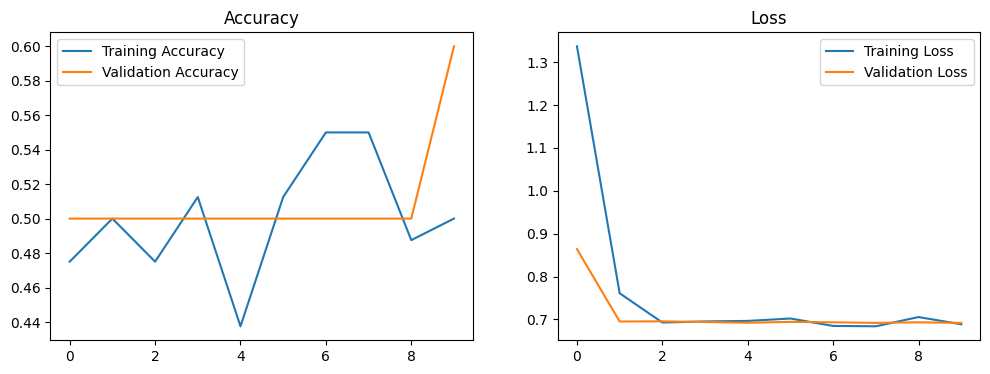

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [9]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

model = load_model("ticket_model.h5")


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Fake" if prediction[0] < 0.5 else "Authentic"

test_image_path = "/content/ticket_dataset/authentic/authentic_ticket_1.jpg"
if os.path.exists(test_image_path):
    print(f"The ticket is: {predict_image(test_image_path)}")
else:
    print(f"File not found: {test_image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The ticket is: Authentic


In [10]:
import os
dataset_dir = "/content/ticket_dataset"
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))


/content/ticket_dataset/fake/fake_ticket_28.jpg
/content/ticket_dataset/fake/fake_ticket_22.jpg
/content/ticket_dataset/fake/fake_ticket_1.jpg
/content/ticket_dataset/fake/fake_ticket_43.jpg
/content/ticket_dataset/fake/fake_ticket_35.jpg
/content/ticket_dataset/fake/fake_ticket_32.jpg
/content/ticket_dataset/fake/fake_ticket_2.jpg
/content/ticket_dataset/fake/fake_ticket_19.jpg
/content/ticket_dataset/fake/fake_ticket_40.jpg
/content/ticket_dataset/fake/fake_ticket_46.jpg
/content/ticket_dataset/fake/fake_ticket_14.jpg
/content/ticket_dataset/fake/fake_ticket_10.jpg
/content/ticket_dataset/fake/fake_ticket_41.jpg
/content/ticket_dataset/fake/fake_ticket_26.jpg
/content/ticket_dataset/fake/fake_ticket_12.jpg
/content/ticket_dataset/fake/fake_ticket_36.jpg
/content/ticket_dataset/fake/fake_ticket_3.jpg
/content/ticket_dataset/fake/fake_ticket_39.jpg
/content/ticket_dataset/fake/fake_ticket_9.jpg
/content/ticket_dataset/fake/fake_ticket_21.jpg
/content/ticket_dataset/fake/fake_ticket_17.

In [17]:
import os

test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg'):
            test_images.append(os.path.join(root, file))


for test_image_path in test_images:
    print(f"Testing image: {test_image_path}")
    print(f"The ticket is: {predict_image(test_image_path)}")


In [13]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("ticket_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmplb9vvp_s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135246355061168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355066096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355159824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355163344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355168448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355305344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355312560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246355313616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246353436688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135246353437568: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [14]:
import os


test_images = []
test_dir = '/content/ticket_dataset/test/'
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg'):
            test_images.append(os.path.join(root, file))


for test_image_path in test_images:
    print(f"Testing image: {test_image_path}")
    print(f"The ticket is: {predict_image(test_image_path, model)}")


In [15]:

from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Fake" if prediction[0] < 0.5 else "Authentic"

test_image_path = "/content/ticket_dataset/authentic/authentic_ticket_1.jpg"

print(f"The ticket is: {predict_image(test_image_path, model)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The ticket is: Authentic


In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files


model = load_model("/content/ticket_model.h5")

def predict_image(image_path, model):
    try:
        img = image.load_img(image_path, target_size=(128, 128))

        img_array = image.img_to_array(img) / 255.0


        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)


        if prediction[0] < 0.5:
            return "Fake"
        else:
            return "Authentic"

    except Exception as e:

        print(f"Error: {e}")
        return "Fake"

print("Please upload an image of the ticket for validation.")
uploaded = files.upload()


uploaded_image_path = next(iter(uploaded))

if not uploaded_image_path.lower().endswith(('.jpg', '.jpeg', '.png')):
    print("Invalid image format. Treating this as 'Fake'.")
    result = "Fake"
else:

    result = predict_image(uploaded_image_path, model)
print(f"The ticket is: {result}")

Please upload an image of the ticket for validation.


Saving fake_ticket_10.jpg to fake_ticket_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The ticket is: Authentic


In [20]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr
!tesseract --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,085 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [25]:
# Import libraries
import os
import re
import pytesseract
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

MODEL_PATH = "/content/ticket_model.h5"
try:
    model = load_model(MODEL_PATH)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

def validate_ticket_format(image_path):
    try:
        extracted_text = pytesseract.image_to_string(Image.open(image_path))

        pnr_pattern = r"PNR:\s*\d{9}"
        name_pattern = r"Name:\s*[A-Za-z\s]+"
        date_pattern = r"Date:\s*\d{1,2}/\d{1,2}/\d{4}"
        train_pattern = r"Train:\s*[A-Za-z\s]+"

        if (re.search(pnr_pattern, extracted_text) and
            re.search(name_pattern, extracted_text) and
            re.search(date_pattern, extracted_text) and
            re.search(train_pattern, extracted_text)):
            print("Ticket format is valid!")
            return True
        else:
            print("Ticket format is invalid!")
            return False
    except Exception as e:
        print(f"Error validating format: {e}")
        return False

def predict_ticket(image_path, model):
    try:
        img = image.load_img(image_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        if prediction[0][0] < 0.5:
            return "Fake"
        else:
            return "Valid"
    except Exception as e:
        print(f"Error processing the image: {e}")
        return "Fake"

print("Please upload a ticket image...")
uploaded = files.upload()


uploaded_image_path = next(iter(uploaded))
print(f"Processing file: {uploaded_image_path}")


if validate_ticket_format(uploaded_image_path):

    result = predict_ticket(uploaded_image_path, model)
    if result == "Fake":
        print("Warning: This is a FAKE ticket!")
    else:
        print("The ticket is VALID! Proceeding to next steps...")
else:
    print("Error: Invalid ticket format. This is a FAKE ticket!")


Model loaded successfully!
Please upload a ticket image...


Saving fake_qr_code.png to fake_qr_code.png
Processing file: fake_qr_code.png
Ticket format is invalid!
Error: Invalid ticket format. This is a FAKE ticket!
